In [2]:
import pandas as pd 
import os 
os.chdir(r'C:\Users\Public\Project\wallmart-prediction--master')

In [3]:
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [27]:
dataset = train.merge(features, how= 'left').merge(stores, how= 'left')

In [29]:
dataset.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [30]:
datamkd = dataset.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis= 1)

In [31]:
datamkd.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

In [32]:
datamkd.loc[datamkd['Weekly_Sales']<=0]  # we are checking for outliers since sales data shouldn't be -ve

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,B,118221


Making a new dataframe where -ve values will be removed and this df will be used for further processing 

In [33]:
traindf3=datamkd.loc[datamkd['Weekly_Sales']>0]

In [34]:
traindf3.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
140804,15,21,2010-02-05,3253.19,False,19.83,2.954,131.527903,8.350,B,123737
140661,15,20,2010-02-05,4606.90,False,19.83,2.954,131.527903,8.350,B,123737
140518,15,19,2010-02-05,1381.40,False,19.83,2.954,131.527903,8.350,B,123737
140408,15,18,2010-02-05,2239.25,False,19.83,2.954,131.527903,8.350,B,123737
...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2226.10,False,56.09,3.917,138.728161,8.243,B,120653
342211,36,16,2012-10-26,564.50,False,74.39,3.494,222.113657,6.228,A,39910
390158,41,92,2012-10-26,131128.24,False,41.80,3.686,199.219532,6.195,A,196321
175485,18,81,2012-10-26,14036.52,False,56.09,3.917,138.728161,8.243,B,120653


### Finding out the unique types of stores.

In [35]:
traindf3['Type'].unique() 

array(['A', 'B', 'C'], dtype=object)

Type of stores and their share in sales.


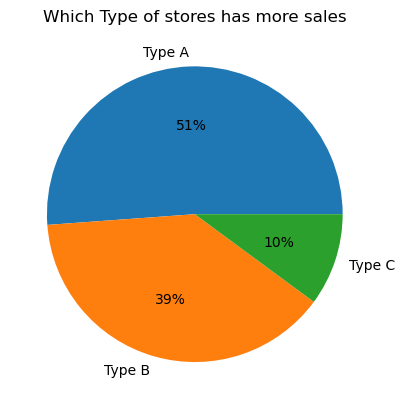

In [36]:
import matplotlib.pyplot as plt
import seaborn

stores = ['Type A','Type B','Type C']

data = traindf3['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Which Type of stores has more sales')
# show plot
plt.show()

In [37]:
traindf3['year'] = pd.DatetimeIndex(traindf3['Date']).year #Separating year data.
traindf3['month'] = pd.DatetimeIndex(traindf3['Date']).month
traindf3['day'] = pd.DatetimeIndex(traindf3['Date']).day

C:\Users\Vedant Kulkarni\AppData\Local\Temp\ipykernel_4496\2421290923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['year'] = pd.DatetimeIndex(traindf3['Date']).year #Separating year data.
C:\Users\Vedant Kulkarni\AppData\Local\Temp\ipykernel_4496\2421290923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['month'] = pd.DatetimeIndex(traindf3['Date']).month
C:\Users\Vedant Kulkarni\AppData\Local\Temp\ipykernel_4496\2421290923.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# import file with data
data = traindf3

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True,fmt='.2g')
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

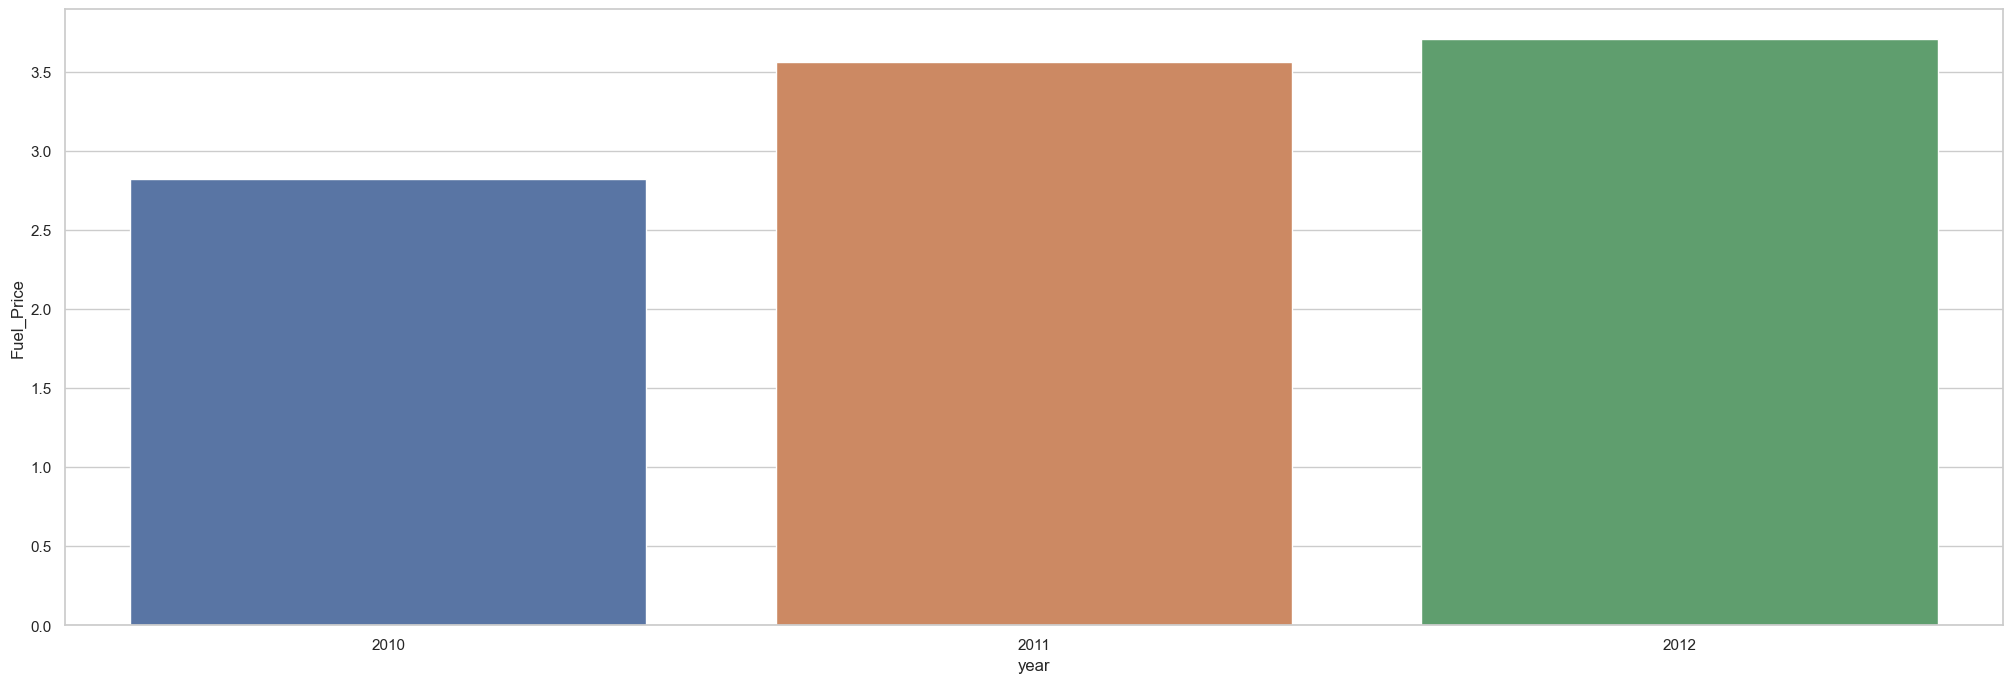

In [47]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips =traindf3
ax = sns.barplot(x="year", y="Fuel_Price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})

Stores vs Weekly Sales bar plt

This shows us all the sales for all the stores i.e 45 stores


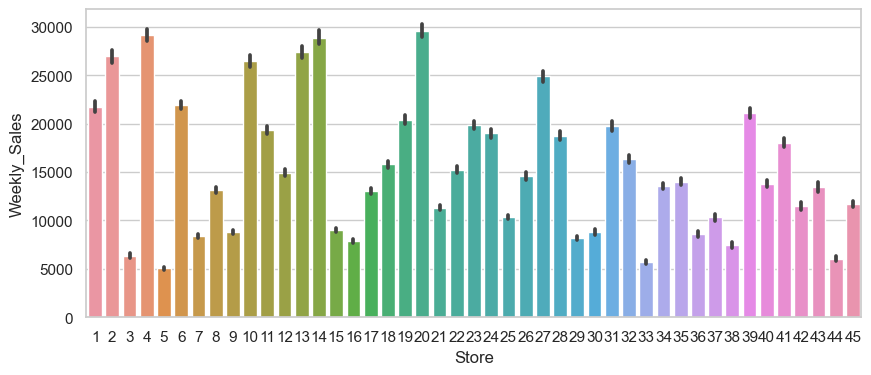

In [48]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf3
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)

For the maximum unemployement i.e 10 to 14 weekly sales is somewhat constant.

KeyboardInterrupt: 

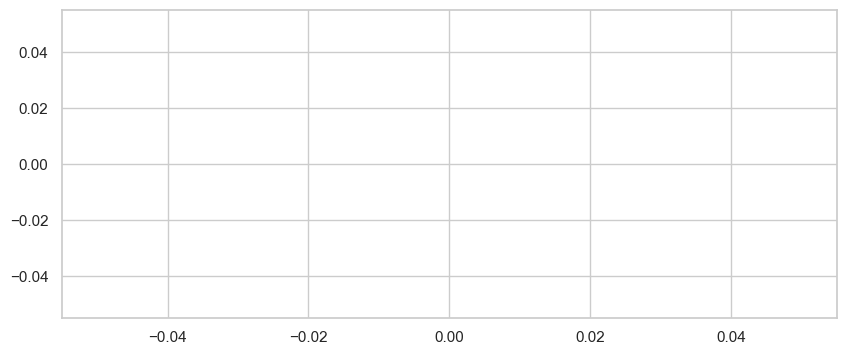

In [54]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf3  
ax = sns.lineplot(x='Weekly_Sales', y="Unemployment", data=tips)

#### Sales increases  with the size of the store

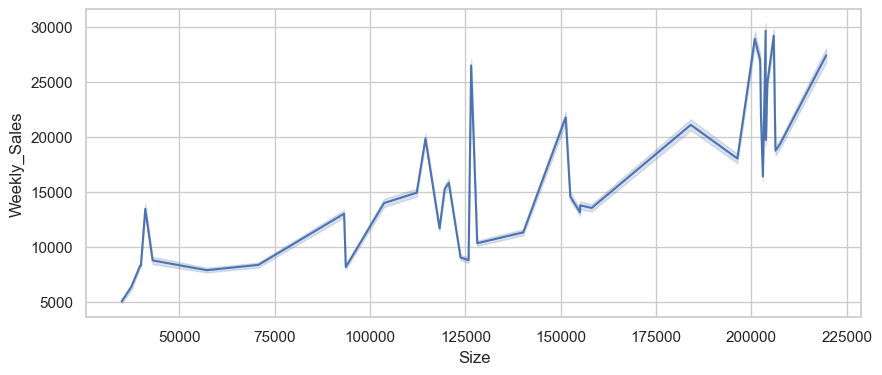

In [51]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf3
ax = sns.lineplot(x='Size', y="Weekly_Sales", data=tips)

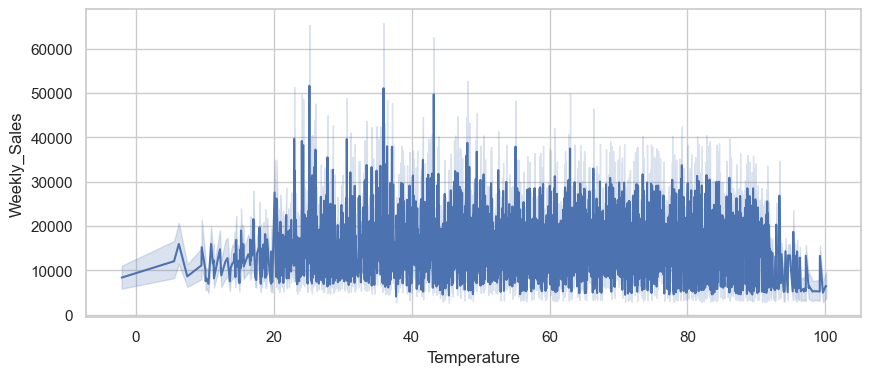

In [53]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf3
ax = sns.lineplot(x='Weekly_Sales', y="Temperature", data=tips)

In [ ]:
month_wise_sales = pd.pivot_table(traindf3, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()